In [1]:
## Importing dependencies
import pandas as pd
import os
import gmaps
import requests
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import chisquare

In [2]:
## Grabbing filepaths
salesPath = os.path.join("..", "Data Sources", "compiled_sales_2018_to_2020.csv")
unemp2018Path = os.path.join("..", "Unemployment_data", "labforce_42_20180100.csv")
unemp2019Path = os.path.join("..", "Unemployment_data", "labforce_42_20190100.csv")
unemp2020Path = os.path.join("..", "Unemployment_data", "labforce_42_20200100.csv")
populationPath = os.path.join("pop_data.csv")

In [3]:
## Reading in CSVs
salesDF = pd.read_csv(salesPath)
unemp2018DF = pd.read_csv(unemp2018Path)
unemp2019DF = pd.read_csv(unemp2019Path)
unemp2020DF = pd.read_csv(unemp2020Path)
populationDF = pd.read_csv(populationPath)

FileNotFoundError: [Errno 2] No such file or directory: '..\\Data Sources\\compiled_sales_2018_to_2020.csv'

In [4]:
populationDF["County"] = populationDF["County"].str.split("County").str[0]
populationDF

,County,2018,2019
0,Adams,103062,103009
1,Allegheny,1217281,1216045
2,Armstrong,65352,64735
3,Beaver,164582,163929
4,Bedford,48094,47888
...,...,...,...
62,Washington,207018,206865
63,Wayne,51395,51361
64,Westmoreland,350459,348899
65,Wyoming,27087,26794


# CLEANING UNEMPLOYMENT DATA

In [5]:
## Starting with only getting the county names
unemp2018Clean = unemp2018DF[unemp2018DF.Areatype == 4]
unemp2019Clean = unemp2019DF[unemp2019DF.Areatype == 4]
unemp2020Clean = unemp2020DF[unemp2020DF.Areatype == 4]

In [6]:
## removing the word "County" after the name of the county
unemp2018Clean["Areaname"] = unemp2018Clean["Areaname"].str.split(" ").str[0]
unemp2019Clean["Areaname"] = unemp2019Clean["Areaname"].str.split(" ").str[0]
unemp2020Clean["Areaname"] = unemp2020DF["Areaname"].str.split(" ").str[0]


C:\Users\Foreg\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Foreg\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Foreg\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [7]:
## Dropping unneccesary columns
unemp2018CleanFinal = unemp2018Clean.drop(["Periodtype","Stfips", "Period", "Periodyear", "Stateabbrv", "Adjusted", "Maparea", "Emplab", "Emppopratio", "Clfprate", "Sortperiod", "Rank", "Fullperiod", "Preliminary", "prelim"], axis = 1)
unemp2019CleanFinal = unemp2019Clean.drop(["Periodtype","Stfips", "Period", "Periodyear", "Stateabbrv", "Adjusted", "Maparea", "Emplab", "Emppopratio", "Clfprate", "Sortperiod", "Rank", "Fullperiod", "Preliminary", "prelim"], axis = 1)
unemp2020CleanFinal = unemp2020Clean.drop(["Periodtype","Stfips", "Period", "Periodyear", "Stateabbrv", "Adjusted", "Maparea", "Emplab", "Emppopratio", "Clfprate", "Sortperiod", "Rank", "Fullperiod", "Preliminary", "prelim"], axis = 1)

In [8]:
unemp2018CleanFinal

,Areaname,Area,Areatype,Timeperiod,Laborforce,Unemp,Unemprate
2,Adams,1,4,"January, 2018",54900,1900,3.6
3,Allegheny,3,4,"January, 2018",641700,28600,4.5
4,Armstrong,5,4,"January, 2018",32000,1800,5.7
5,Beaver,7,4,"January, 2018",83600,4400,5.3
6,Bedford,9,4,"January, 2018",23600,1200,4.9
...,...,...,...,...,...,...,...
1296,Washington,125,4,"December, 2018",106900,4600,4.3
1297,Wayne,127,4,"December, 2018",22500,1100,4.7
1298,Westmoreland,129,4,"December, 2018",181000,8100,4.5
1299,Wyoming,131,4,"December, 2018",13600,700,4.8


In [9]:
## Setting the date column to datetime format so it can be filtered
unemp2018CleanFinal["Timeperiod"] = pd.to_datetime(unemp2018CleanFinal["Timeperiod"])
unemp2019CleanFinal["Timeperiod"] = pd.to_datetime(unemp2019CleanFinal["Timeperiod"])
unemp2020CleanFinal["Timeperiod"] = pd.to_datetime(unemp2020CleanFinal["Timeperiod"])

In [10]:
unemp2018CleanFinal

,Areaname,Area,Areatype,Timeperiod,Laborforce,Unemp,Unemprate
2,Adams,1,4,2018-01-01,54900,1900,3.6
3,Allegheny,3,4,2018-01-01,641700,28600,4.5
4,Armstrong,5,4,2018-01-01,32000,1800,5.7
5,Beaver,7,4,2018-01-01,83600,4400,5.3
6,Bedford,9,4,2018-01-01,23600,1200,4.9
...,...,...,...,...,...,...,...
1296,Washington,125,4,2018-12-01,106900,4600,4.3
1297,Wayne,127,4,2018-12-01,22500,1100,4.7
1298,Westmoreland,129,4,2018-12-01,181000,8100,4.5
1299,Wyoming,131,4,2018-12-01,13600,700,4.8


In [11]:
unemp20182ndHalf = unemp2018CleanFinal[unemp2018CleanFinal.Timeperiod > '2018-06-30']
unemp20191stHalf = unemp2019CleanFinal[unemp2019CleanFinal.Timeperiod < '2019-07-01']
unemp20192ndHalf = unemp2019CleanFinal[unemp2019CleanFinal.Timeperiod > '2019-06-30']
unemp20201stHalf = unemp2020CleanFinal[unemp2020CleanFinal.Timeperiod < '2020-07-01']

In [12]:
fiscal20182019 = pd.merge(unemp20182ndHalf, unemp20191stHalf, how = "outer", on = ["Areaname", "Area", "Areatype", "Timeperiod", "Laborforce", "Unemp", "Unemprate"])
fiscal20192020 = pd.merge(unemp20192ndHalf, unemp20201stHalf, how = "outer", on = ["Areaname", "Area", "Areatype", "Timeperiod", "Laborforce", "Unemp", "Unemprate"])

In [13]:
county20182019Group = fiscal20182019.groupby("Areaname")
county20192020Group = fiscal20192020.groupby("Areaname")

In [14]:
countyMean20182019 = county20182019Group.mean()
countyMean20192020 = county20192020Group.mean()

In [15]:
salesDF

,County,2017-2018 Year Total ($),2018-2019 Year Total ($),2019-2020 Year Total ($)
0,Adams,5974649.0,6087119.0,5474672.0
1,Allegheny,287446445.0,297562217.0,282457996.0
2,Armstrong,4119789.0,4100004.0,3946644.0
3,Beaver,20662151.0,21929547.0,21044165.0
4,Bedford,3794119.0,3777616.0,3624763.0
...,...,...,...,...
62,Washington,31624485.0,32219420.0,26798762.0
63,Wayne,12547260.0,12861710.0,12246352.0
64,Westmoreland,62689517.0,63286292.0,60414024.0
65,Wyoming,3017967.0,2920391.0,3026001.0


In [16]:
countyMean20182019

,Area,Areatype,Laborforce,Unemp,Unemprate
Areaname,,,,,
Adams,1.0,4.0,55250.000000,1841.666667,3.308333
Allegheny,3.0,4.0,647291.666667,26425.000000,4.083333
Armstrong,5.0,4.0,32033.333333,1550.000000,4.891667
Beaver,7.0,4.0,83691.666667,3733.333333,4.466667
Bedford,9.0,4.0,23600.000000,1091.666667,4.541667
...,...,...,...,...,...
Washington,125.0,4.0,106708.333333,4633.333333,4.333333
Wayne,127.0,4.0,22416.666667,1083.333333,4.775000
Westmoreland,129.0,4.0,180450.000000,8025.000000,4.441667


r value: 0.9328315949
r-squared = 0.8702


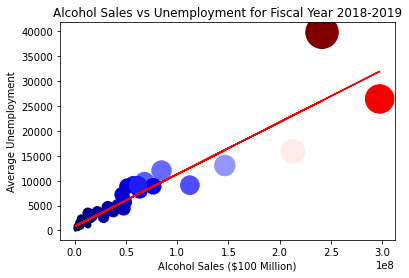

In [17]:
xValues = salesDF["2018-2019 Year Total ($)"]
yValues = countyMean20182019["Unemp"]
weights = populationDF["2018"]
plt.scatter(xValues, yValues, s = (weights / 1500), c = weights, cmap = "seismic")
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
print(f'r value: {round(rvalue, 10)}')
print(f'r-squared = {round(rvalue * rvalue, 4)}')
plt.plot(xValues, regression, color = "red")
plt.title("Alcohol Sales vs Unemployment for Fiscal Year 2018-2019")
plt.xlabel("Alcohol Sales ($100 Million)")
plt.ylabel("Average Unemployment")
plt.savefig("2018-2019")
plt.show()

In [18]:
ttestFiscal1 = st.ttest_ind(xValues, yValues)
print(ttestFiscal1)

Ttest_indResult(statistic=4.66162103203012, pvalue=7.576850205285343e-06)


r value: 0.9261378078
r-squared = 0.8577


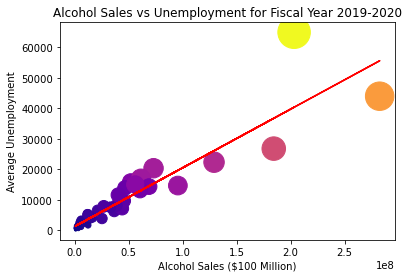

In [19]:
xValues = salesDF["2019-2020 Year Total ($)"]
yValues = countyMean20192020["Unemp"]
weights = populationDF["2019"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
print(f'r value: {round(rvalue, 10)}')
print(f'r-squared = {round(rvalue * rvalue, 4)}')
plt.plot(xValues, regression, color = "red")
plt.scatter(xValues, yValues, s = (weights / 1500), c = weights, cmap = "plasma")
plt.title("Alcohol Sales vs Unemployment for Fiscal Year 2019-2020")
plt.xlabel("Alcohol Sales ($100 Million)")
plt.ylabel("Average Unemployment")
plt.savefig("2019-2020")
plt.show()

r value: -0.2453958133
r-squared = 0.0602


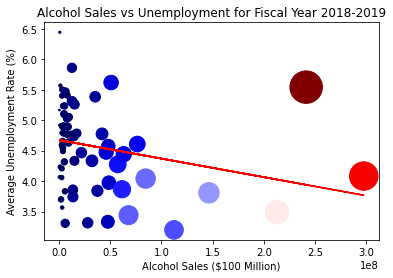

In [24]:
xValues = salesDF["2018-2019 Year Total ($)"]
yValues = countyMean20182019["Unemprate"]
weights = populationDF["2018"]
plt.scatter(xValues, yValues, s = (weights / 1500), c = weights, cmap = "seismic")
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
print(f'r value: {round(rvalue, 10)}')
print(f'r-squared = {round(rvalue * rvalue, 4)}')
plt.plot(xValues, regression, color = "red")
plt.title("Alcohol Sales vs Unemployment for Fiscal Year 2018-2019")
plt.xlabel("Alcohol Sales ($100 Million)")
plt.ylabel("Average Unemployment Rate (%)")
plt.savefig("2018-2019 (rate)")
plt.show()

r value: -0.1766310388
r-squared = 0.0312


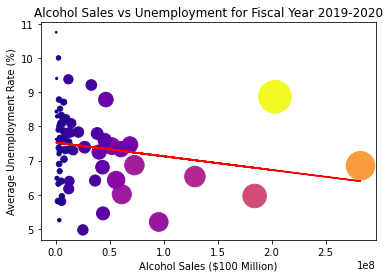

In [25]:
xValues = salesDF["2019-2020 Year Total ($)"]
yValues = countyMean20192020["Unemprate"]
weights = populationDF["2019"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
print(f'r value: {round(rvalue, 10)}')
print(f'r-squared = {round(rvalue * rvalue, 4)}')
plt.plot(xValues, regression, color = "red")
plt.scatter(xValues, yValues, s = (weights / 1500), c = weights, cmap = "plasma")
plt.title("Alcohol Sales vs Unemployment for Fiscal Year 2019-2020")
plt.xlabel("Alcohol Sales ($100 Million)")
plt.ylabel("Average Unemployment Rate (%)")
plt.savefig("2019-2020 (rate)")
plt.show()